In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import re

In [86]:
df=pd.read_csv('C:/Users/general/Downloads/h1b_kaggle.zip')

In [87]:
df

,CASE_ID,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,state,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,ANN ARBOR,washington,-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,PLANO,new york,-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,JERSEY CITY,new york,-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,DENVER,washington,-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,ST. LOUIS,washington,-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048571,CERTIFIED,LARSEN & TOUBRO INFOTECH LIMITED,COMPUTER PROGRAMMERS,COMPUTER PROGRAMMER,Y,51605.0,2015,HOUSTON,new york,-95.369803,29.760427
1048571,1048572,CERTIFIED,"ALLSCRIPTS HEALTHCARE, LLC","MANAGERS, ALL OTHER","MANAGER, PROFESSIONAL SERVICES",Y,103792.0,2015,PITTSBURGH,new york,-79.995886,40.440625
1048572,1048573,CERTIFIED,"HEALTHLINE NETWORKS, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",SENIOR UI ENGINEER,Y,94162.0,2015,SAN FRANCISCO,new york,-122.419415,37.774929
1048573,1048574,CERTIFIED,"THE HACKETT GROUP, INC.",COMPUTER AND INFORMATION SYSTEMS MANAGERS,MANAGER,Y,120619.0,2015,CHICAGO,new york,-87.629798,41.878114


In [88]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   CASE_ID             1048575 non-null  int64  
 1   CASE_STATUS         1048575 non-null  object 
 2   EMPLOYER_NAME       1048556 non-null  object 
 3   SOC_NAME            1048564 non-null  object 
 4   JOB_TITLE           1048567 non-null  object 
 5   FULL_TIME_POSITION  1048574 non-null  object 
 6   PREVAILING_WAGE     1048571 non-null  float64
 7   YEAR                1048575 non-null  int64  
 8   WORKSITE            1048542 non-null  object 
 9   state               1048575 non-null  object 
 10  lon                 1019007 non-null  float64
 11  lat                 1019007 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 96.0+ MB


,CASE_ID,PREVAILING_WAGE,YEAR,lon,lat
count,1.048575e+06,1.048571e+06,1.048575e+06,1.019007e+06,1.019007e+06
mean,5.242880e+05,8.942724e+04,2.015618e+03,-9.224186e+01,3.816965e+01
std,3.026977e+05,1.643214e+06,4.859268e-01,1.936639e+01,4.606127e+00
min,1.000000e+00,0.000000e+00,2.015000e+03,-1.578583e+02,1.343719e+01
25%,2.621445e+05,5.636800e+04,2.015000e+03,-1.118910e+02,3.415175e+01
50%,5.242880e+05,6.651800e+04,2.016000e+03,-8.648955e+01,3.908400e+01
75%,7.864315e+05,8.247200e+04,2.016000e+03,-7.559826e+01,4.088374e+01
max,1.048575e+06,3.291392e+08,2.016000e+03,1.457298e+02,6.483778e+01


In [89]:
df.head()

,CASE_ID,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,state,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,ANN ARBOR,washington,-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,PLANO,new york,-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,JERSEY CITY,new york,-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,DENVER,washington,-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,ST. LOUIS,washington,-90.199404,38.627003


In [90]:
df['CASE_STATUS'].value_counts()

CERTIFIED              914251
CERTIFIED-WITHDRAWN     83160
WITHDRAWN               35494
DENIED                  15670
Name: CASE_STATUS, dtype: int64

In [91]:
df=df.drop(df[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'].index)

In [92]:
df=df.drop(df[df['CASE_STATUS']=='WITHDRAWN'].index)

In [93]:
df['CASE_STATUS'].value_counts()

CERTIFIED    914251
DENIED        15670
Name: CASE_STATUS, dtype: int64

In [94]:
count_nan=len(df) -df.count()
print(count_nan)

CASE_ID                   0
CASE_STATUS               0
EMPLOYER_NAME            12
SOC_NAME                  6
JOB_TITLE                 3
FULL_TIME_POSITION        1
PREVAILING_WAGE           3
YEAR                      0
WORKSITE                 29
state                     0
lon                   26082
lat                   26082
dtype: int64


In [95]:
df['EMPLOYER_NAME'].mode()[0]

'INFOSYS LIMITED'

In [96]:
df['EMPLOYER_NAME']=df['EMPLOYER_NAME'].fillna(df['EMPLOYER_NAME'].mode()[0])

In [97]:
df['SOC_NAME']=df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])
df['JOB_TITLE']=df['JOB_TITLE'].fillna(df['JOB_TITLE'].mode()[0])
df['FULL_TIME_POSITION']=df['FULL_TIME_POSITION'].fillna(df['FULL_TIME_POSITION'].mode()[0])
df['PREVAILING_WAGE']=df['PREVAILING_WAGE'].fillna(df['PREVAILING_WAGE'].mode()[0])


In [98]:
df=df.drop('lat',axis=1)
df=df.drop('lon',axis=1)
df=df.drop('WORKSITE',axis=1)
df=df.drop('CASE_ID',axis=1)
df=df.drop('EMPLOYER_NAME',axis=1)
df=df.drop('JOB_TITLE',axis=1)

In [99]:
count_nan=len(df)-df.count()
print(count_nan)


CASE_STATUS           0
SOC_NAME              0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
state                 0
dtype: int64


In [100]:
def boxplot(df,col):
        data_to_plot=[df[df['CASE_STATUS']=='CERTIFIED'][col],df[df['CASE_STATUS']=='DENIED'][col]]
        fig =plt.figure(figsize=(9,6))
        ax=fig.add_subplot(111)
        ax.boxplot(data_to_plot)
        plt.ylabel(col,fontsize=14)
        plt.show()
                    

In [101]:
df.isnull().any().any()

False

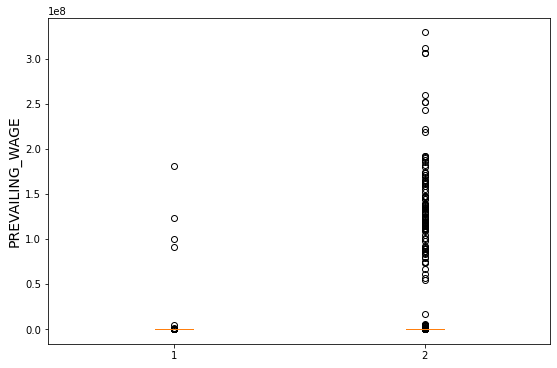

In [102]:
boxplot(df,'PREVAILING_WAGE')

In [103]:
df['SOC_NAME']=df['SOC_NAME'].str.lower()
df['state']=df['state'].str.lower()

In [104]:
df['SOC_NAME'].value_counts()

software developers, applications                       162018
computer systems analysts                               159803
computer programmers                                    130823
computer occupations, all other                          81738
software developers, systems software                    28936
                                                         ...  
architectural and engineers managers                         1
computer occupations/all other                               1
title examiners, abstractors, and searchers                  1
transportation managers                                      1
elementary school teachers, except special education         1
Name: SOC_NAME, Length: 1117, dtype: int64

In [105]:
import sys
import warnings
warnings.filterwarnings("ignore")
df['SOC_NAME1'] = 'others'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer','software')]='it'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('chief','management')]='manager'


In [106]:
df['SOC_NAME1'].value_counts()

others     490815
it         438304
manager       802
Name: SOC_NAME1, dtype: int64

In [107]:
df=df.drop('SOC_NAME',axis=1)

In [108]:
df

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,state,SOC_NAME1
18,CERTIFIED,Y,187200.0,2016,new york,manager
19,CERTIFIED,Y,241842.0,2016,washington,manager
22,CERTIFIED,Y,99986.0,2016,new york,manager
23,CERTIFIED,Y,99986.0,2016,new york,manager
25,CERTIFIED,Y,187200.0,2016,new york,manager
...,...,...,...,...,...,...
1048570,CERTIFIED,Y,51605.0,2015,new york,it
1048571,CERTIFIED,Y,103792.0,2015,new york,others
1048572,CERTIFIED,Y,94162.0,2015,new york,others
1048573,CERTIFIED,Y,120619.0,2015,new york,it


In [109]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df.FULL_TIME_POSITION)
print(le.classes_)
df['FULL_TIME_POSITION']=le.transform(df['FULL_TIME_POSITION'])
print(df.FULL_TIME_POSITION)


['N' 'Y']
18         1
19         1
22         1
23         1
25         1
          ..
1048570    1
1048571    1
1048572    1
1048573    1
1048574    1
Name: FULL_TIME_POSITION, Length: 929921, dtype: int32


In [110]:
df['state'].value_counts()

new york      578944
washington    261845
indiana        89132
Name: state, dtype: int64

In [111]:
x=df.drop('CASE_STATUS',axis=1).values
x

array([[1, 187200.0, 2016, 'new york', 'manager'],
       [1, 241842.0, 2016, 'washington', 'manager'],
       [1, 99986.0, 2016, 'new york', 'manager'],
       ...,
       [1, 94162.0, 2015, 'new york', 'others'],
       [1, 120619.0, 2015, 'new york', 'it'],
       [1, 109512.0, 2015, 'washington', 'it']], dtype=object)

In [112]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df.CASE_STATUS)
print(le.classes_)
y=le.transform(df['CASE_STATUS'])
y

['CERTIFIED' 'DENIED']


array([0, 0, 0, ..., 0, 0, 0])

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [114]:
x

array([[1, 187200.0, 2016, 'new york', 'manager'],
       [1, 241842.0, 2016, 'washington', 'manager'],
       [1, 99986.0, 2016, 'new york', 'manager'],
       ...,
       [1, 94162.0, 2015, 'new york', 'others'],
       [1, 120619.0, 2015, 'new york', 'it'],
       [1, 109512.0, 2015, 'washington', 'it']], dtype=object)

In [115]:
ct=ColumnTransformer([("oh",OneHotEncoder(),[3])],remainder="passthrough")
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 187200.0, 2016, 'manager'],
       [0.0, 0.0, 1.0, ..., 241842.0, 2016, 'manager'],
       [0.0, 1.0, 0.0, ..., 99986.0, 2016, 'manager'],
       ...,
       [0.0, 1.0, 0.0, ..., 94162.0, 2015, 'others'],
       [0.0, 1.0, 0.0, ..., 120619.0, 2015, 'it'],
       [0.0, 0.0, 1.0, ..., 109512.0, 2015, 'it']], dtype=object)

In [116]:
x=x[:,1:]
x

array([[1.0, 0.0, 1, 187200.0, 2016, 'manager'],
       [0.0, 1.0, 1, 241842.0, 2016, 'manager'],
       [1.0, 0.0, 1, 99986.0, 2016, 'manager'],
       ...,
       [1.0, 0.0, 1, 94162.0, 2015, 'others'],
       [1.0, 0.0, 1, 120619.0, 2015, 'it'],
       [0.0, 1.0, 1, 109512.0, 2015, 'it']], dtype=object)

In [117]:
ct2=ColumnTransformer([("oh",OneHotEncoder(),[5])],remainder="passthrough")
x=ct2.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 1, 187200.0, 2016],
       [0.0, 1.0, 0.0, ..., 1, 241842.0, 2016],
       [0.0, 1.0, 0.0, ..., 1, 99986.0, 2016],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 94162.0, 2015],
       [1.0, 0.0, 0.0, ..., 1, 120619.0, 2015],
       [1.0, 0.0, 0.0, ..., 1, 109512.0, 2015]], dtype=object)

In [118]:
x=x[:,1:]
x

array([[1.0, 0.0, 1.0, ..., 1, 187200.0, 2016],
       [1.0, 0.0, 0.0, ..., 1, 241842.0, 2016],
       [1.0, 0.0, 1.0, ..., 1, 99986.0, 2016],
       ...,
       [0.0, 1.0, 1.0, ..., 1, 94162.0, 2015],
       [0.0, 0.0, 1.0, ..., 1, 120619.0, 2015],
       [0.0, 0.0, 0.0, ..., 1, 109512.0, 2015]], dtype=object)

In [119]:
import joblib
joblib.dump(ct,'vivtransform')

['vivtransform']

In [120]:
import joblib
joblib.dump(ct2,'vivtransform2')

['vivtransform2']

In [121]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [123]:
seed=7
test_size=0.40
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=seed)

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

In [125]:
pipe=Pipeline([("mn",MinMaxScaler()),("nb",GaussianNB())])

In [126]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('mn', MinMaxScaler()), ('nb', GaussianNB())])

In [127]:
joblib.dump(pipe,'vi.save')

['vi.save']

In [128]:
y_pred=pipe.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9824071360785441

In [130]:
x

array([[1.0, 0.0, 1.0, ..., 1, 187200.0, 2016],
       [1.0, 0.0, 0.0, ..., 1, 241842.0, 2016],
       [1.0, 0.0, 1.0, ..., 1, 99986.0, 2016],
       ...,
       [0.0, 1.0, 1.0, ..., 1, 94162.0, 2015],
       [0.0, 0.0, 1.0, ..., 1, 120619.0, 2015],
       [0.0, 0.0, 0.0, ..., 1, 109512.0, 2015]], dtype=object)

In [131]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
pipe.predict([[0,0,0,0,1,187200,2015]])

array([0])

In [133]:
pipe.predict([[1,1,0,1,1,187200,2016]])

array([1])